In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Rocket_Loans.xlsx")
df.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop_duplicates() # there is no duplicates

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,28,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,33,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,39,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,47,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop("Loan_ID",axis = 1) #we dont requried loan id so we drop it 
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1. a) Check for missing values in the dataset. Apply appropriate imputation techniques if dataset has missing values. 

In [5]:
df.isna().sum()

Sex                            13
Age                             0
Married                         3
No. of People in the Family    15
Qualification                   0
Self_Employed                  32
Loan_Bearer_Income              0
Loan_Cobearer_Income            0
Amount Disbursed               21
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

In [6]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].fillna(mode(df[i]))

In [7]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        df[i] = df[i].fillna(mode(df[i]))

In [8]:
df.isna().sum()

Sex                            0
Age                            0
Married                        0
No. of People in the Family    0
Qualification                  0
Self_Employed                  0
Loan_Bearer_Income             0
Loan_Cobearer_Income           0
Amount Disbursed               0
Loan_Tenure                    0
Credit_Score                   0
Location_type                  0
Loan_Status                    0
dtype: int64

In [9]:
df.Sex.value_counts()

Male      502
Female    112
Name: Sex, dtype: int64

In [10]:
df["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df["No. of People in the Family"].unique()

array([0, 1, 2, '3+'], dtype=object)

In [12]:
df['No. of People in the Family'] = df['No. of People in the Family'].fillna(0)

In [13]:
df["No. of People in the Family"] = df["No. of People in the Family"].replace(['3+'],[3])

In [14]:
df["No. of People in the Family"].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
le = LabelEncoder() # these step i do label encoder
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i])


In [16]:
df

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,33,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,39,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,47,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
def custom_summary(df):
    
    result = []
    for i in df.columns:
        
        statistics = OrderedDict({
            "Feature Name": i,
            'Count': df[i].count(),
            'Data type': df[i].dtype,
            'Min': round(df[i].min(),2),
            "Quartiles 1": round(df[i].quantile(.25),2),
            "Mean": round(df[i].mean(),2),
            "Median": round(df[i].quantile(.50),2),
            "Quartiles 3": round(df[i].quantile(.75),2),
            "Max": round(df[i].max(),2),
            "Var": round(df[i].var(),2),
            "Std": round(df[i].std(),2),
            'IQR': round(df[i].quantile(.75),2) - round(df[i].quantile(.25),2),
        })
        
        result.append(statistics)
        
        
        #checking for kurtosis

        if df[i].kurt() >= 1 :  #start kurt
            label = 'LeptoKurtic'
        elif df[i].kurt() <= -1 :
            label = 'Platykurtic'
        else:
            label = 'Mesokurtic'      #end kurt
        statistics['kurtosis comment'] = label
        
        #checking for skewness
        sk=df[i].skew()
        if sk<=-1:
            sk_v='Highle -ve skewed'
        elif sk>-1 and sk<-0.5:
            sk_v='Moderately -ve skewed'
        elif sk>=-0.5 and sk<=0.5:
            sk_v='Approx symmetric'
        elif sk>0.5 and sk<1:
            sk_v='Moderately +ve skewed'
        elif sk>=1:
            sk_v='Highle +ve skewed'
        statistics['skewness comment'] = sk_v
        
        
    result_df = pd.DataFrame(data = result)
        
    return(result_df)
        

In [18]:
custom_summary(df)

,Feature Name,Count,Data type,Min,Quartiles 1,Mean,Median,Quartiles 3,Max,Var,Std,IQR,kurtosis comment,skewness comment
0,Sex,614,int32,0.0,1.00,0.82,1.0,1.00,1.0,0.15,0.39,0.00,Mesokurtic,Highle -ve skewed
1,Age,614,int64,25.0,32.00,38.47,39.0,45.00,52.0,66.01,8.12,13.00,Platykurtic,Approx symmetric
2,Married,614,int32,0.0,0.00,0.65,1.0,1.00,1.0,0.23,0.48,1.00,Platykurtic,Moderately -ve skewed
3,No. of People in the Family,614,int64,0.0,0.00,0.74,0.0,1.00,3.0,1.02,1.01,1.00,Mesokurtic,Highle +ve skewed
4,Qualification,614,int32,0.0,0.00,0.22,0.0,0.00,1.0,0.17,0.41,0.00,Mesokurtic,Highle +ve skewed
5,Self_Employed,614,int32,0.0,0.00,0.13,0.0,0.00,1.0,0.12,0.34,0.00,LeptoKurtic,Highle +ve skewed
6,Loan_Bearer_Income,614,int64,150.0,2877.50,5403.46,3812.5,5795.00,81000.0,37320390.17,6109.04,2917.50,LeptoKurtic,Highle +ve skewed
7,Loan_Cobearer_Income,614,float64,0.0,0.00,1621.25,1188.5,2297.25,41667.0,8562929.52,2926.25,2297.25,LeptoKurtic,Highle +ve skewed
8,Amount Disbursed,614,float64,9.0,100.25,145.45,125.0,164.75,700.0,7087.67,84.19,64.50,LeptoKurtic,Highle +ve skewed
9,Loan_Tenure,614,float64,12.0,360.00,342.41,360.0,360.00,480.0,4151.05,64.43,0.00,LeptoKurtic,Highle -ve skewed


  c) Check for outliers in the dataset if any 

In [19]:
def outlier_treat(df, col, method = 'quartile', strategy = 'median'):
    
    
    data = df[col]
    median = data.median()
    mean = data.mean()

    if method == 'quartile':
        q1 = data.quantile(.25)
        q2 = data.quantile(.5)
        q3 = data.quantile(.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
    elif method == 'stdev':
        std = data.std()
        upper_limit = mean + 2 * std
        lower_limit = mean - 2 * std
    else:
        print('invalid method')
      
    
    outliers = df.loc[(data<lower_limit)|(data>upper_limit),col]
    outlier_percentage = round((len(outliers)/len(data)) * 100,2)
     
    if len(outliers) == 0 :
        print(f'feature {col} does not have any outlier') 
        print('________________________________________')
    else:
        print(f'feature {col} has outliers')
        print(f'outlier percentage is {outlier_percentage}')
        print('________________________________________')
              
              
    if strategy == 'median':
        df.loc[(data<lower_limit)|(data>upper_limit),col] = median
    elif strategy == 'mean':
        df.loc[(data<lower_limit)|(data>upper_limit),col] = mean
    else:
        print('pass a correct strategy')
        print('________________________________________')
    
              
    return(df)

# Implementing odt plots (outlier detection plot )

In [20]:
def odtplots(df,col):
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
    
    #ploting the box plot
    
    sns.boxplot(df[col],ax=ax1,color='red')
    ax1.set_title('box plot for '+ col)
    ax1.set_xlabel('values')
    ax1.set_ylabel('box plot distribution')
    
    
    #ploting the histogram with outliers
    
    sns.distplot(df[col],ax=ax2,color='blue')
    ax2.set_title('Histogram with outlier for '+ col)
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Distribution')
    
    
    # ploting the histogram without outlier
    
    y = outlier_treat(df,col) 
    sns.distplot(y[col],ax=ax3,color='green')
    ax3.set_title('Histogram without outlier for '+ col)
    ax3.set_xlabel('Values')
    ax3.set_ylabel('Distribution')
    
    
    plt.show()

feature Age does not have any outlier
________________________________________


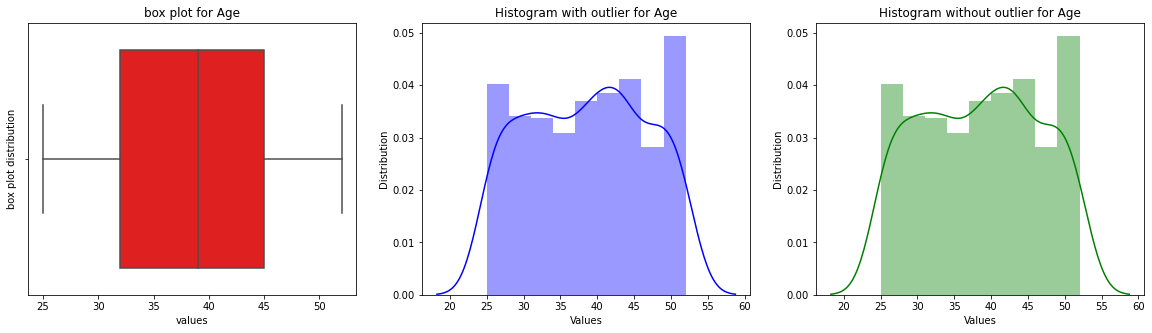

In [21]:
odtplots(df,'Age')

feature Loan_Bearer_Income has outliers
outlier percentage is 8.14
________________________________________


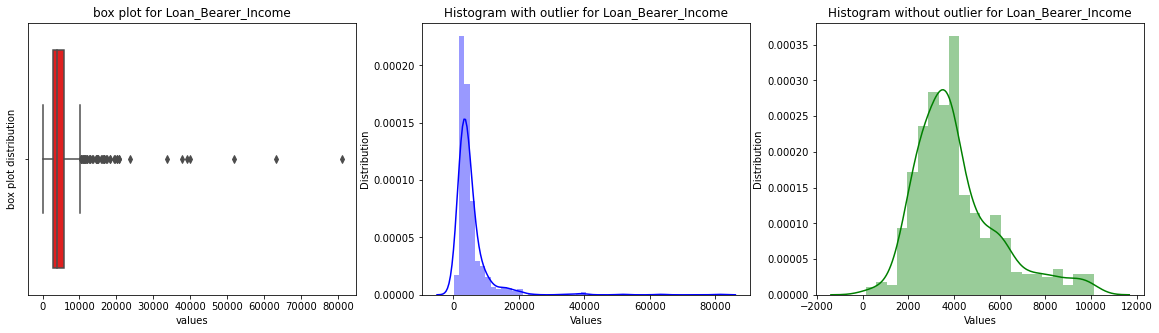

In [22]:
odtplots(df,'Loan_Bearer_Income')

feature Loan_Cobearer_Income has outliers
outlier percentage is 2.93
________________________________________


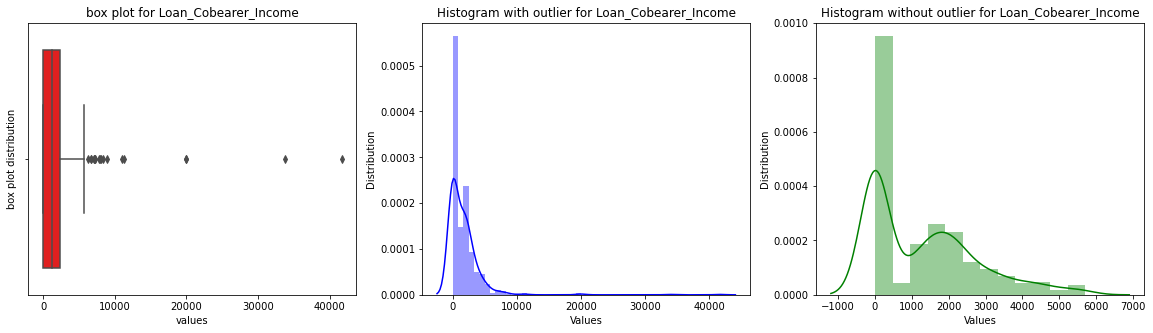

In [23]:
odtplots(df,'Loan_Cobearer_Income')

feature Amount Disbursed has outliers
outlier percentage is 6.68
________________________________________


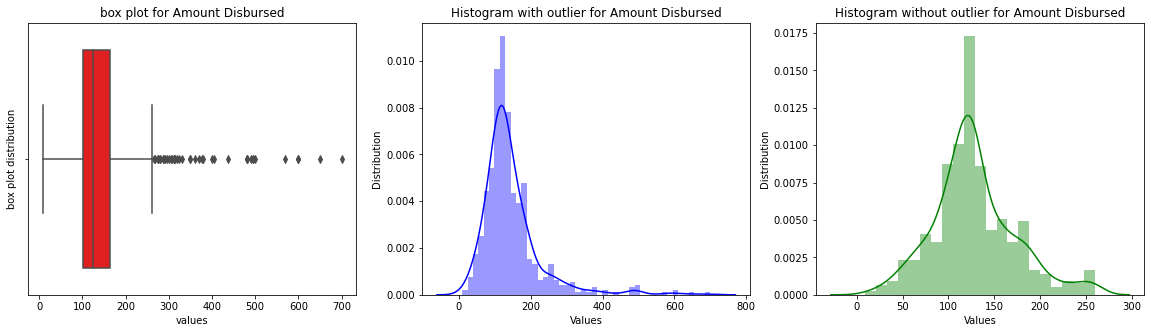

In [24]:
odtplots(df,'Amount Disbursed')

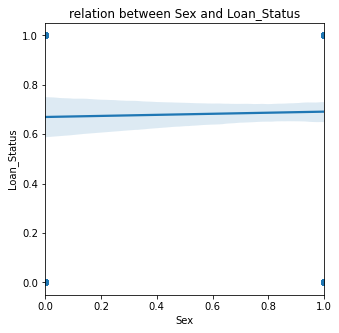

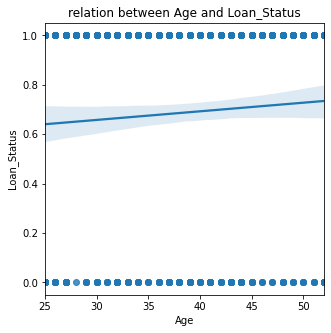

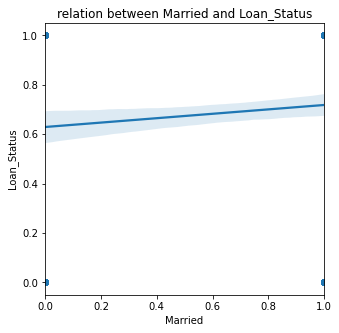

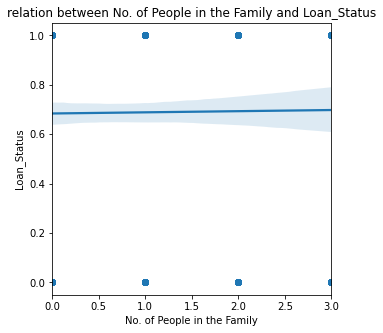

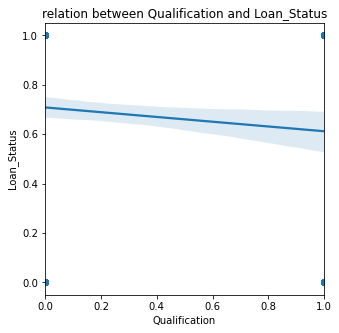

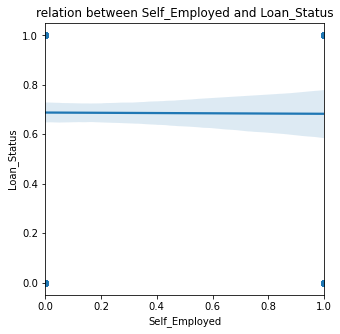

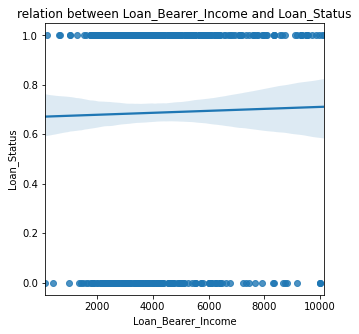

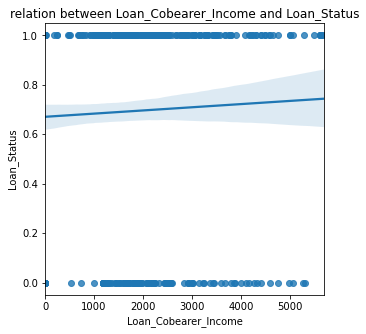

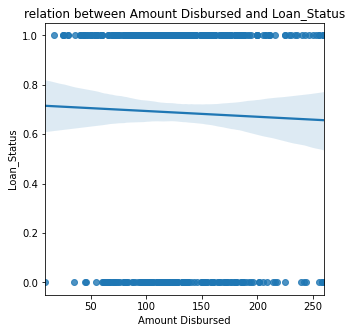

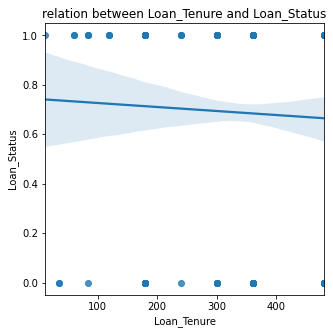

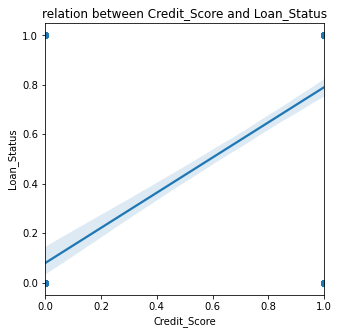

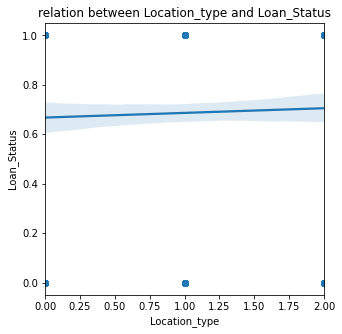

In [25]:
for col in df.columns :
    if col != 'Loan_Status' :
        f, ax = plt.subplots(figsize = (5,5))
        sns.regplot(x = df[col], y = df['Loan_Status']).set_title(f'relation between {col} and Loan_Status')

2. Find loan approval rate for applicants having credit score (i.e. 1) 

In [26]:
(df["Credit_Score"] == 1).sum() #There are 475 applicante who have credit score is 1

525

3. Give frequency distribution of total income for each group below.  (i.e. Total Income =  Loan_bearer_income + Loan_Cobearer_income)  
- Below 5k  
- 5k to 10k    
- 10k to 15k   
- Above 15k 

In [27]:
total_income = df['Loan_Bearer_Income'] + df["Loan_Cobearer_Income"] #first we convert  new columns as a total income
df["total_income"] = total_income
df

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,total_income
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1,5849.0
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1,2900.0
610,1,33,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1,4106.0
611,1,39,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1,8312.0
612,1,47,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1,7583.0


In [28]:
df['total_income'].value_counts(bins = [0,5000,10000,15000,100000]) #the frequncy of total income

(-0.001, 5000.0]       321
(5000.0, 10000.0]      268
(10000.0, 15000.0]      25
(15000.0, 100000.0]      0
Name: total_income, dtype: int64

# Correlation matrix

In [29]:
def corr_variables(df,target):
    ind_var = df.drop(target,axis=1).columns
    
    corr_result = []
    for col in ind_var:
        corr_result.append(df[target].corr(df[col]))
        
    result_df = pd.DataFrame([ind_var,corr_result],index = ['variables','correlation']).T.sort_values('correlation',ascending = False)
    
    return result_df

In [30]:
corr_variables(df,'Loan_Status')

,variables,correlation
10,Credit_Score,0.540556
2,Married,0.091478
1,Age,0.061043
12,total_income,0.041249
7,Loan_Cobearer_Income,0.039885
11,Location_type,0.032112
0,Sex,0.017987
6,Loan_Bearer_Income,0.015912
3,No. of People in the Family,0.010118
5,Self_Employed,-0.0037


In [31]:
df = df.drop("total_income",axis = 1)
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


# Checking  Multicolinearity

<AxesSubplot:>

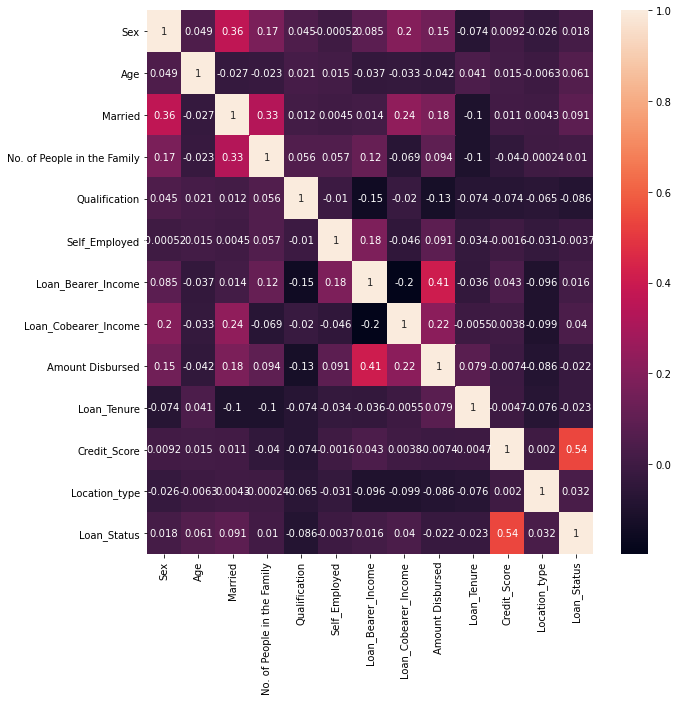

In [32]:
corr = df.corr()

fig = plt.subplots(figsize =(10,10))
sns.heatmap(corr,annot=True)

In [33]:
# loan_Cobearer_Income and Amount Disbursed (22%)
# loan_bearer_Income and Amount Disbursed (41%)
# loan_Cobearer_Income and Married (24%)
# Amount Disbursed and married (18%)
# No. of People in the Family and married (33%)
# married and sex (36%)

# Varriance inflation Factor (VIF)

In [34]:
def vif(df,target):
    indep_var = df.drop(target,axis =1 )
    vif_df = pd.DataFrame()
    vif_df['vif_factor'] = [variance_inflation_factor(indep_var.values,i) for i in range(indep_var.shape[1])]
    vif_df['names'] = indep_var.columns
    
    return vif_df.sort_values('vif_factor',ascending=False)

In [35]:
vif(df,'Loan_Status')

,vif_factor,names
9,18.634539,Loan_Tenure
1,17.306119,Age
8,12.606883,Amount Disbursed
6,8.079841,Loan_Bearer_Income
0,6.510158,Sex
10,6.455361,Credit_Score
2,3.865133,Married
11,2.655006,Location_type
7,2.308614,Loan_Cobearer_Income
3,1.825923,No. of People in the Family


# PCA

In [36]:
def apply_pca(x):
    col = []
    n_comp = len(x.columns)
    
    
    x =StandardScaler().fit_transform(x)
    
    
    for i in range(1,n_comp): # efining n component using for loop
        pca = PCA(n_components = i) # transforming x
        p_comp = pca.fit_transform(x) # doing cumiulative sum to find out total data capture
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9: # checking the data is more than 90 %
            n_components = i # condering i value to be n compent based on evr
            break
    
    print("The explined variance ratio is",evr)
    
    #creating data farme with PCA transfrom data
    
    for j in range(1,n_components + 1):
        col.append("pc_"+ str(j))
        
    result = pd.DataFrame(data = p_comp,columns=col)
        
        
    return(result)

In [37]:
pca_df = apply_pca(df.drop("Loan_Status",axis = 1))

The explined variance ratio is [0.15658331 0.27983719 0.38600268 0.47758656 0.56394835 0.64569584
 0.72367506 0.79528565 0.86153342 0.92148276]


In [38]:
pca_df = pca_df.join(df[['Loan_Status']],how='left')


In [39]:
pca_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,Loan_Status
0,-1.045419,1.112459,0.331157,-1.228497,0.142848,0.181268,-0.221694,0.409233,1.016994,-1.189447,1
1,0.917997,0.052284,-0.622143,0.119441,0.153095,-0.505424,-1.062381,-0.053571,-0.782130,-0.534803,0
2,-0.479131,0.139624,1.100775,-0.934708,-0.082200,-0.468724,1.448840,-2.342982,0.018120,-1.689125,1
3,-0.098942,-1.836279,-0.275684,-0.245806,0.354188,-0.396449,0.146564,-0.553412,2.018500,0.046823,1
4,-0.779669,1.335958,0.135444,-0.818849,-1.314747,0.794423,0.199840,1.005420,1.050974,-0.476676,1
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.763363,0.820721,-0.354596,0.149127,1.138277,-1.118097,-1.079622,-0.312538,-1.226690,0.047379,1
610,0.717952,-1.140078,2.571694,-0.334171,0.275207,-1.439508,-1.280635,0.663518,-2.507043,-0.543907,1
611,2.199210,2.118323,0.123501,-1.164529,-0.166631,1.021634,-0.416524,0.793360,1.616057,0.582838,1
612,1.734370,1.371042,1.009046,-0.946659,-1.157767,1.362064,-0.701922,0.486523,0.755301,0.567980,1


In [40]:
vif(pca_df,'Loan_Status')

,vif_factor,names
4,1.0,pc_5
0,1.0,pc_1
1,1.0,pc_2
3,1.0,pc_4
5,1.0,pc_6
6,1.0,pc_7
7,1.0,pc_8
8,1.0,pc_9
2,1.0,pc_3
9,1.0,pc_10


In [41]:
def train_and_test_split(df,target,testSize=0.3):
    x = df.drop(target,axis = 1)
    y = df[[target]]
    
    return(train_test_split(x,y,test_size=testSize, random_state= 0))

In [42]:
def build_model(model_name, estimetor, data, target):
    x_train, x_test ,y_train, y_test = train_and_test_split(data,target)
    estimetor.fit(x_train,y_train)
    y_pred = estimetor.predict(x_test)

    Accuracy = accuracy_score(y_test,y_pred)
    
    temp = [model_name,Accuracy]
    
    return(temp)



In [43]:
build_model("logistic regression",LogisticRegression(),pca_df,"Loan_Status")

['logistic regression', 0.8216216216216217]

In [44]:
def muliple_model(data, target):
    col_names = ["Model names","Accuracy"]
    
    result_df = pd.DataFrame(columns= col_names)
    
    result_df.loc[len(result_df)] = build_model("logistic regression",LogisticRegression(),data,target)
    
    result_df.loc[len(result_df)] = build_model("Ridge",RidgeClassifier(),data,target)
        
    result_df.loc[len(result_df)] = build_model("Decision tree",DecisionTreeClassifier(),data,target)
    
    result_df.loc[len(result_df)] = build_model("KNN",KNeighborsClassifier(),data,target)
    
    result_df.loc[len(result_df)] = build_model("SVM",SVC(),data,target)

    result_df.loc[len(result_df)] = build_model("Random forest",RandomForestClassifier(),data,target)
    
    result_df.loc[len(result_df)] = build_model("Adaboost",AdaBoostClassifier(),data,target)
    
    result_df.loc[len(result_df)] = build_model("Gradient boost",GradientBoostingClassifier(),data,target)
    
    result_df.loc[len(result_df)] = build_model("XGBoost",XGBClassifier(),data,target)
    
    return(result_df.sort_values('Accuracy',ascending=False))
    

In [45]:
muliple_model(pca_df,"Loan_Status")

[19:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model names,Accuracy
1,Ridge,0.827027
4,SVM,0.827027
0,logistic regression,0.821622
3,KNN,0.810811
5,Random forest,0.800000
7,Gradient boost,0.794595
6,Adaboost,0.789189
8,XGBoost,0.789189
2,Decision tree,0.708108


In [46]:
# the models that has to be taken futher are SVM, logistic Regression , KNN , Random forest , Gradient boosting

In [47]:
def cv_score(x,y,fold=10):
    
    # fitting cross validation for all models
    score_lr= cross_val_score(LogisticRegression(),x,y,cv=fold)
    score_rd= cross_val_score(RidgeClassifier(),x,y,cv=fold)
    score_dt= cross_val_score(DecisionTreeClassifier(),x,y,cv=fold)
    score_knn= cross_val_score(KNeighborsClassifier(),x,y,cv=fold)
    score_svr= cross_val_score(SVC(),x,y,cv=fold)
    score_rf= cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    score_Ada= cross_val_score(AdaBoostClassifier(),x,y,cv=fold)
    score_gr= cross_val_score(GradientBoostingClassifier(),x,y,cv=fold)
    score_xgb= cross_val_score(XGBClassifier(),x,y,cv=fold)
    
    model_names =['Logistic Regression','Ridge Classifier','Decission Tree','KNN',"SVC",'RAndon forest','Ada boost','Gradient boost','Xgboost']
    scores = [score_lr,score_rd,score_dt,score_knn,score_svr,score_rf,score_Ada,score_gr,score_xgb]
    
    result= []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        estimator = model_names[i]
        temp = [estimator,score_std,score_mean]
        result.append(temp)
        
    results = pd.DataFrame(data= result,columns=['model_names','score_std','score_mean'])
    
    return results.sort_values('score_mean',ascending=False)
        

In [48]:
cv_score(pca_df.drop('Loan_Status',axis=1),pca_df[['Loan_Status']])

[19:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_std,score_mean
0,Logistic Regression,0.033478,0.809572
1,Ridge Classifier,0.033478,0.809572
4,SVC,0.033478,0.809572
3,KNN,0.049533,0.781967
7,Gradient boost,0.055307,0.767134
5,RAndon forest,0.059186,0.763855
8,Xgboost,0.052367,0.752327
6,Ada boost,0.068412,0.734532
2,Decission Tree,0.061176,0.672660


In [49]:
def hyper_tuning(x,y,fold=10):
    
    # param_ensemble= {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
    param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
    param_rf = {'max_depth':[8,9,10,11,12],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
    param_lr = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['l2'],'C':[100, 10, 1.0, 0.1, 0.01]}
    param_rd = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
    param_sv = {'kernel':['poly', 'rbf', 'sigmoid'],'C':[50, 10, 1.0, 0.1, 0.01],'gamma':['scale']}
    
    
    tune_lr = GridSearchCV(LogisticRegression(),param_lr,cv=fold)
    tune_rd = GridSearchCV(RidgeClassifier(),param_rd,cv=fold)
    tune_sv = GridSearchCV(SVC(),param_sv,cv=fold)
    tune_rf = GridSearchCV(RandomForestClassifier(),param_rf,cv=fold)
    tune_kn = GridSearchCV(KNeighborsClassifier(),param_knn,cv=fold)
    
    tune_lr.fit(x,y)
    tune_rd.fit(x,y)
    tune_sv.fit(x,y)
    tune_rf.fit(x,y)
    tune_kn.fit(x,y)
    
    tune=[tune_lr,tune_rd,tune_sv,tune_rf,tune_kn]
    models=['Logistic Regression','Ridge Classifier','SVC','Random Forest','KNN']
    
    for i in range(0,len(tune)):
        print('model',models[i])
        print('Best parameters',tune[i].best_params_)
    

In [50]:
hyper_tuning(pca_df.drop('Loan_Status',axis=1),pca_df[['Loan_Status']])

model Logistic Regression
Best parameters {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
model Ridge Classifier
Best parameters {'alpha': 0.1}
model SVC
Best parameters {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
model Random Forest
Best parameters {'max_depth': 8, 'n_estimators': 70}
model KNN
Best parameters {'n_neighbors': 14}


In [51]:
def cv_score_tune(x,y,fold=10):
    
    # fitting cross validation for all models
    score_lr= cross_val_score(LogisticRegression(C=100,penalty='l2',solver= 'newton-cg'),x,y,cv=fold)
    score_knn= cross_val_score(KNeighborsClassifier(n_neighbors=14),x,y,cv=fold)
    score_rf= cross_val_score(RandomForestClassifier(max_depth = 8, n_estimators= 50),x,y,cv=fold)
    score_sv= cross_val_score(SVC(C = 1.0,gamma ='scale', kernel= 'rbf'),x,y,cv=fold)
    score_rd= cross_val_score(RidgeClassifier(alpha = 0.1),x,y,cv=fold)
    
    model_names =['Logistic Regression','KNN','Randon forest','SVC','Ridge Classifier']
    scores = [score_lr,score_knn,score_rf,score_sv,score_rd]
    
    result= []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        estimator = model_names[i]
        temp = [estimator,score_std,score_mean]
        result.append(temp)
        
    results = pd.DataFrame(data= result,columns=['model_names','score_std','score_mean'])
    
    return results.sort_values('score_mean',ascending=False)
        

In [52]:
cv_score_tune(pca_df.drop('Loan_Status',axis=1),pca_df[['Loan_Status']])

,model_names,score_std,score_mean
0,Logistic Regression,0.033478,0.809572
3,SVC,0.033478,0.809572
4,Ridge Classifier,0.033478,0.809572
1,KNN,0.032529,0.807932
2,Randon forest,0.051088,0.783369


In [53]:
# Learning curve analysis

In [54]:
def learning_curve_analysis(model_name,estimator,x,y):
    
    
    train_size,train_score,test_score = learning_curve(estimator,X= x ,y= y,cv=10)
    train_score_mean = np.mean(train_score,axis = 1)
    test_score_mean = np.mean(test_score,axis = 1)
    
    
    plt.plot(train_size,train_score_mean,color = 'r')
    plt.plot(train_size,test_score_mean,color ='g')
    plt.xlabel('Samples')
    plt.ylabel('Score')
    plt.title('Learning Curve for '+ model_name)
    plt.legend(['train_score','test_score'])

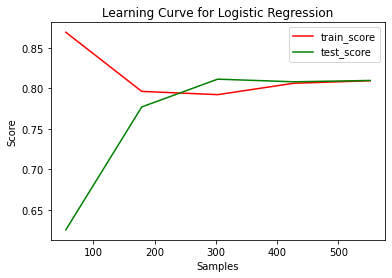

In [55]:
learning_curve_analysis('Logistic Regression',LogisticRegression(C=100,penalty='l2',solver= 'newton-cg'),pca_df.drop('Loan_Status',axis=1),pca_df[['Loan_Status']])

In [56]:
# applaying clustering to see if accuracy is improving
from sklearn.cluster import KMeans
x = df.drop('Loan_Status',axis =1)
y = df[['Loan_Status']]

In [57]:
labels = KMeans(n_clusters=2,random_state=100).fit_predict(x)

<AxesSubplot:xlabel='Sex', ylabel='Loan_Status'>

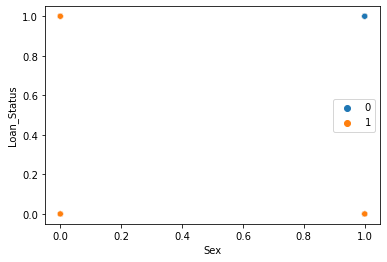

In [58]:
sns.scatterplot(x['Sex'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Age', ylabel='Loan_Status'>

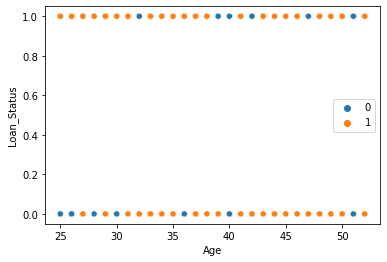

In [59]:
sns.scatterplot(x['Age'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

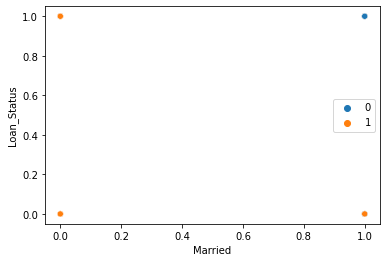

In [60]:
sns.scatterplot(x['Married'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='No. of People in the Family', ylabel='Loan_Status'>

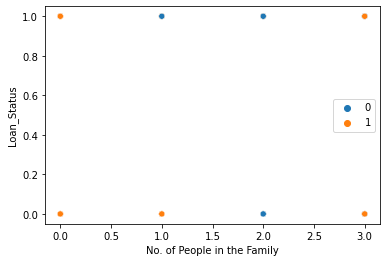

In [61]:
sns.scatterplot(x['No. of People in the Family'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Qualification', ylabel='Loan_Status'>

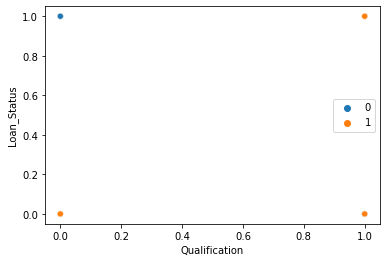

In [62]:
sns.scatterplot(x['Qualification'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

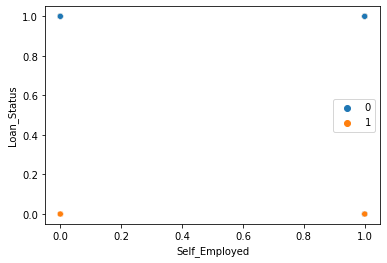

In [63]:
sns.scatterplot(x['Self_Employed'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Loan_Bearer_Income', ylabel='Loan_Status'>

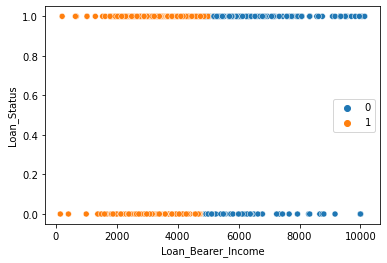

In [64]:
sns.scatterplot(x['Loan_Bearer_Income'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Loan_Cobearer_Income', ylabel='Loan_Status'>

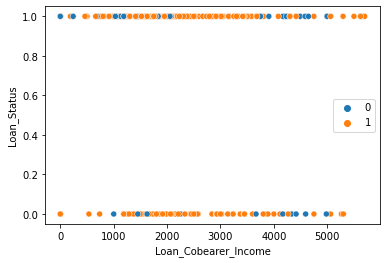

In [65]:
sns.scatterplot(x['Loan_Cobearer_Income'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Amount Disbursed', ylabel='Loan_Status'>

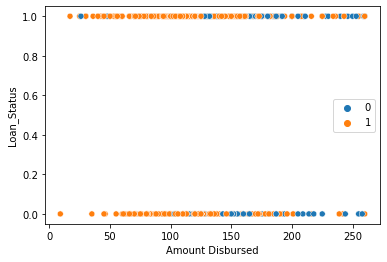

In [66]:
sns.scatterplot(x['Amount Disbursed'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Loan_Tenure', ylabel='Loan_Status'>

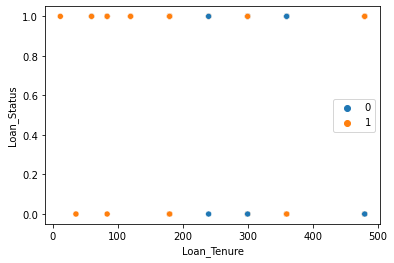

In [67]:
sns.scatterplot(x['Loan_Tenure'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Credit_Score', ylabel='Loan_Status'>

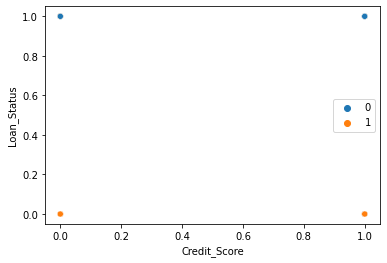

In [68]:
sns.scatterplot(x['Credit_Score'],y.Loan_Status,hue=labels)

<AxesSubplot:xlabel='Location_type', ylabel='Loan_Status'>

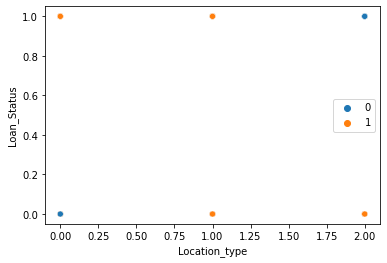

In [69]:
sns.scatterplot(x['Location_type'],y.Loan_Status,hue=labels)

In [70]:
clusterdf =df.join(pd.DataFrame(labels,columns=['labels']),how = 'left')

In [71]:
cv_score(clusterdf.drop('Loan_Status',axis=1),clusterdf[['Loan_Status']])

[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_std,score_mean
1,Ridge Classifier,0.033478,0.809572
0,Logistic Regression,0.032779,0.804654
5,RAndon forest,0.035589,0.796589
7,Gradient boost,0.043212,0.794923
6,Ada boost,0.034353,0.788234
8,Xgboost,0.045570,0.768826
2,Decission Tree,0.070734,0.700423
4,SVC,0.005314,0.687308
3,KNN,0.039541,0.623903


In [72]:
# Feature importance using XGBoost

In [73]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [74]:
xgb = XGBClassifier()

In [75]:
xgb.fit(x_train,y_train)

[19:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

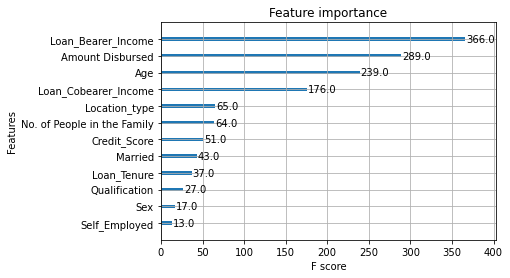

In [76]:
xgboost.plot_importance(xgb)

In [77]:
x = clusterdf[[ 'Age', 'Married', 'No. of People in the Family', 'Loan_Bearer_Income', 'Loan_Cobearer_Income','Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type']]
y = clusterdf[['Loan_Status']]

In [78]:
cv_score(x,y)

[19:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_std,score_mean
1,Ridge Classifier,0.033478,0.809572
0,Logistic Regression,0.030333,0.804654
7,Gradient boost,0.039762,0.794950
5,RAndon forest,0.029499,0.788340
6,Ada boost,0.030921,0.783395
8,Xgboost,0.037553,0.778556
2,Decission Tree,0.066629,0.692464
4,SVC,0.005314,0.687308
3,KNN,0.039541,0.623903


# Deep Learning

In [79]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
x = df.drop('Loan_Status',axis=1)
y = df[['Loan_Status']]

In [81]:
model = Sequential([Dense(36,activation='tanh',input_shape=(12,)),
                    Dense(18,activation='relu'),
                    Dense(1,activation='sigmoid')])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                468       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 19        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(x_train,y_train,epochs=8,batch_size=30,validation_data=(x_test,y_test))

Epoch 1/8
17/17 [==============================] - 1s 17ms/step - loss: 0.7204 - accuracy: 0.4929 - val_loss: 0.6576 - val_accuracy: 0.6504
Epoch 2/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6864 - val_loss: 0.6456 - val_accuracy: 0.6748
Epoch 3/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.6925 - val_loss: 0.6429 - val_accuracy: 0.6748
Epoch 4/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.6945 - val_loss: 0.6459 - val_accuracy: 0.6748
Epoch 5/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.7026 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 6/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.7047 - val_loss: 0.6496 - val_accuracy: 0.6585
Epoch 7/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.7088 - val_loss: 0.6462 - val_accuracy: 0.6504
Epoch 8/8
17/17 [=========

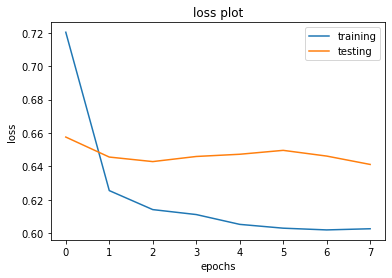

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training','testing'])

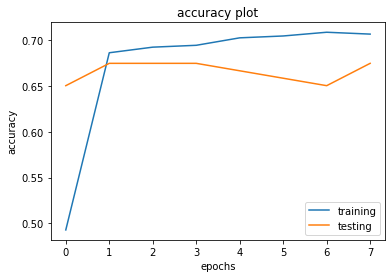

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])